Exploratory Data Analysis
---
In this notebook, we will perform exploratory data analysis on the dataset to understand the data better. We will look at the distribution of the target variable, the distribution of the features, and the relationship between the features and the target variable. We will also look at the correlation between the features and the target variable. This will help us understand the data better and identify any patterns or trends that may exist in the data.

In [1]:
# necessary imports
import pandas as pd

/var/folders/96/d0b81fgx57nf5q8xrlw36p1w0000gn/T/ipykernel_18570/4277383764.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [76]:
# load the dataset
df = pd.read_csv('prepped_data/Full_data.csv')

# Define a function to reposition and rename columns
def reposition_and_rename_columns(df):
    # Get the column names
    columns = df.columns.tolist()

    # Remove the 'Hour' and 'Sum_Volume' columns from the list
    columns.remove('Hour')
    columns.remove('Sum_Volume')

    # Insert 'hour' column at the 8th position
    columns.insert(11, 'Hour')

    # Insert 'traffic_volume_sum' column at the 9th position
    columns.insert(12, 'Sum_Volume')

    # Reorder the DataFrame with the new column order
    df = df[columns]  # Reordering columns without reindexing

    # Rename columns
    df = df.rename(columns={'Hour': 'hour', 'Sum_Volume': 'traffic_volume_sum'})

    return df

# Reposition and rename columns
df = reposition_and_rename_columns(df)

In [77]:
# Converting 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Setting 'date' as the index for easier time series plotting
df.set_index('date', inplace=True)

In [78]:
# Display the first few rows of the dataset
df.head()

,NO_ugm3,NO2_ugm3,O3_ugm3,CO_mgm3,CO2_mgm3,PM25_ugm3,SiteID,Lat,Long,day_of_week,...,DCC-AQ5-pm4,DCC-AQ52-pm4,DCC-AQ6-pm4,DCC-AQ1-so2,DCC-AQ13-so2,DCC-AQ22-so2,TNO2161-tsp,TNO2162-tsp,TNO4435-tsp,TNT1088-tsp
date,,,,,,,,,,,,,,,,,,,,,
2021-05-06,-16.485096,4.267365,70.815263,0.275750,786.544417,3.815981,325,53.327618,-6.309232,3,...,3.49,3.89,6.13,2.22,-0.40,0.51,0.18,7.07,8.9,8.78
2021-05-06,-0.466100,11.630600,71.484000,0.282222,800.609500,7.049500,770,53.335275,-6.317469,3,...,3.75,3.36,5.10,2.07,-0.49,0.64,0.20,7.27,11.2,4.30
2021-05-06,32.199310,14.004828,61.570000,0.404724,795.937567,3.140167,619,53.326383,-6.322198,3,...,3.75,3.36,5.10,2.07,-0.49,0.64,0.20,7.27,11.2,4.30
2021-05-06,24.686167,31.937167,54.446000,0.567000,830.621600,9.055143,487,53.329272,-6.334426,3,...,3.75,3.36,5.10,2.07,-0.49,0.64,0.20,7.27,11.2,4.30
2021-05-06,0.391708,-6.196404,80.784941,0.293809,790.788080,3.640216,547,53.306713,-6.301091,3,...,3.49,3.89,6.13,2.22,-0.40,0.51,0.18,7.07,8.9,8.78


## Summary Statistics for the Target Variable

In [91]:
# Calculate basic descriptive statistics for PM2.5 concentration
pm25_stats = df['PM25_ugm3'].describe()

# Display the statistics
print(pm25_stats)

count    43195.000000
mean         8.854604
std          8.399824
min          0.071000
25%          4.425687
50%          6.952182
75%         11.003435
max        279.452222
Name: PM25_ugm3, dtype: float64


In [92]:
# Calculate skewness and kurtosis for PM2.5 concentration
skewness = df['PM25_ugm3'].skew()
kurtosis = df['PM25_ugm3'].kurt()

# Display skewness and kurtosis
print("Skewness of PM2.5 concentration:", skewness)
print("Kurtosis of PM2.5 concentration:", kurtosis)

Skewness of PM2.5 concentration: 8.747950814292077
Kurtosis of PM2.5 concentration: 168.2839664640497


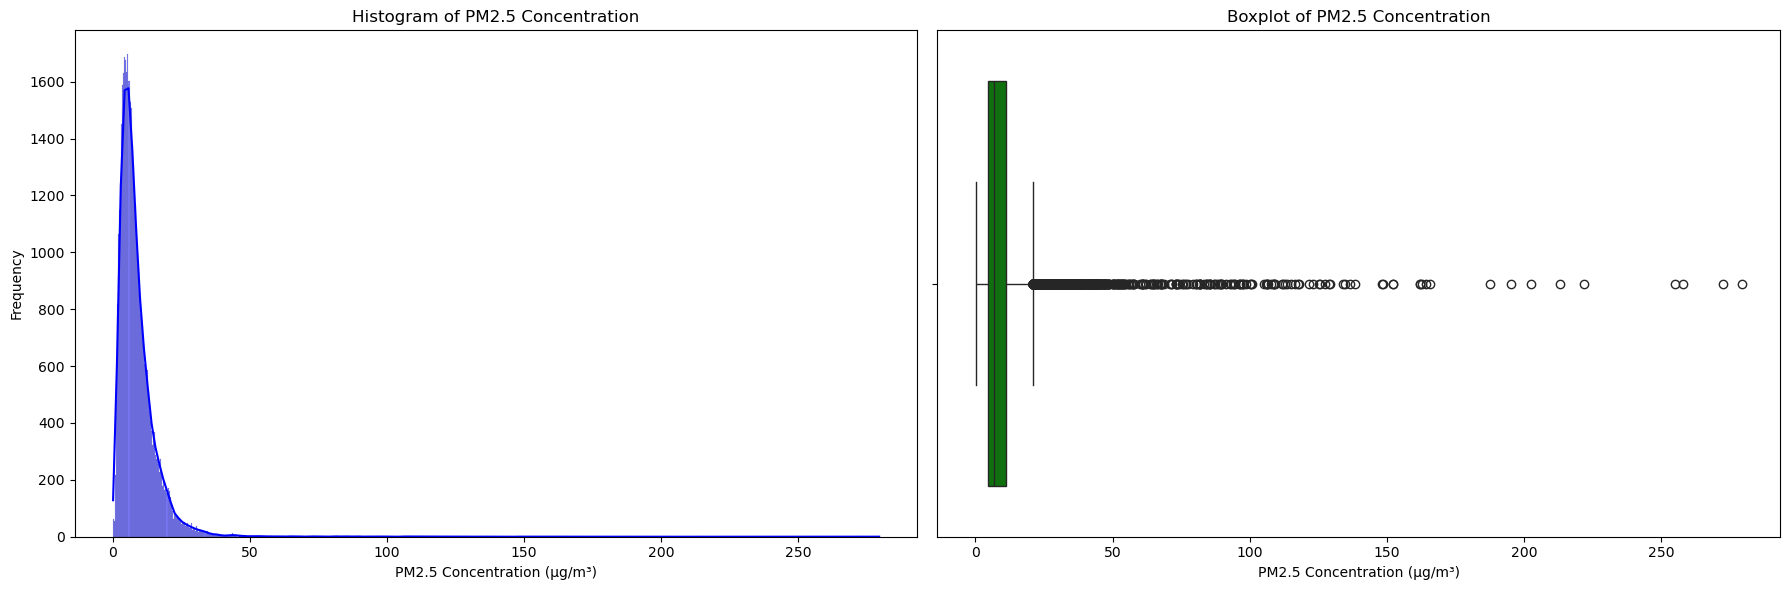

In [93]:
# Plotting the distribution of PM2.5 concentration
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Histogram of PM2.5 concentration
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(df['PM25_ugm3'], kde=True, color='blue')
plt.title('Histogram of PM2.5 Concentration')
plt.xlabel('PM2.5 Concentration (µg/m³)')
plt.ylabel('Frequency')

# Boxplot of PM2.5 concentration
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(x=df['PM25_ugm3'], color='green')
plt.title('Boxplot of PM2.5 Concentration')
plt.xlabel('PM2.5 Concentration (µg/m³)')

# Show the plots
plt.tight_layout()
plt.show()

Missing Values
---
Let's check for missing values in the dataset.

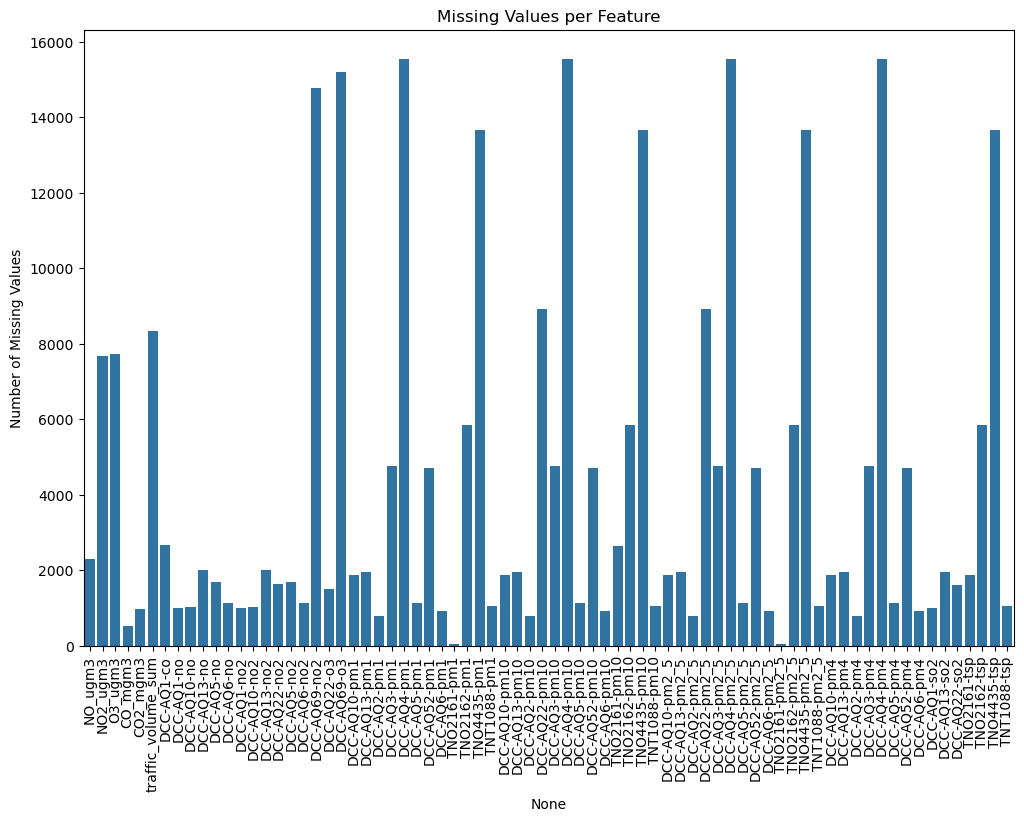

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# reset the index
# df.reset_index(inplace=True)

# Assuming df is your DataFrame
# Calculate the number of missing values per column
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]  # Filter out columns with no missing values

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)  # Rotate labels for better readability if there are many features
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Feature')
plt.show()

Time Series Plot
---
Let's plot the time series of the target variable to see how it changes over time.

In [82]:
df

,NO_ugm3,NO2_ugm3,O3_ugm3,CO_mgm3,CO2_mgm3,PM25_ugm3,SiteID,Lat,Long,day_of_week,...,DCC-AQ52-pm4,DCC-AQ6-pm4,DCC-AQ1-so2,DCC-AQ13-so2,DCC-AQ22-so2,TNO2161-tsp,TNO2162-tsp,TNO4435-tsp,TNT1088-tsp,month_year
date,,,,,,,,,,,,,,,,,,,,,
2021-05-06,-16.485096,4.267365,70.815263,0.275750,786.544417,3.815981,325,53.327618,-6.309232,3,...,3.89,6.13,2.22,-0.40,0.51,0.18,7.07,8.9,8.78,2021-05
2021-05-06,-0.466100,11.630600,71.484000,0.282222,800.609500,7.049500,770,53.335275,-6.317469,3,...,3.36,5.10,2.07,-0.49,0.64,0.20,7.27,11.2,4.30,2021-05
2021-05-06,32.199310,14.004828,61.570000,0.404724,795.937567,3.140167,619,53.326383,-6.322198,3,...,3.36,5.10,2.07,-0.49,0.64,0.20,7.27,11.2,4.30,2021-05
2021-05-06,24.686167,31.937167,54.446000,0.567000,830.621600,9.055143,487,53.329272,-6.334426,3,...,3.36,5.10,2.07,-0.49,0.64,0.20,7.27,11.2,4.30,2021-05
2021-05-06,0.391708,-6.196404,80.784941,0.293809,790.788080,3.640216,547,53.306713,-6.301091,3,...,3.89,6.13,2.22,-0.40,0.51,0.18,7.07,8.9,8.78,2021-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-05,NaN,NaN,NaN,NaN,NaN,3.759600,543,53.388295,-6.214775,4,...,NaN,5.07,1.95,0.20,-2.16,NaN,9.33,NaN,5.90,2022-08
2022-08-05,39.784000,NaN,NaN,0.332280,813.173176,5.138429,443,53.363169,-6.221922,4,...,NaN,4.63,2.03,0.80,-2.23,NaN,15.79,NaN,2.93,2022-08
2022-08-05,NaN,NaN,NaN,NaN,NaN,3.566308,963,53.339290,-6.236580,4,...,NaN,5.18,1.98,0.19,-2.54,NaN,10.29,NaN,4.03,2022-08


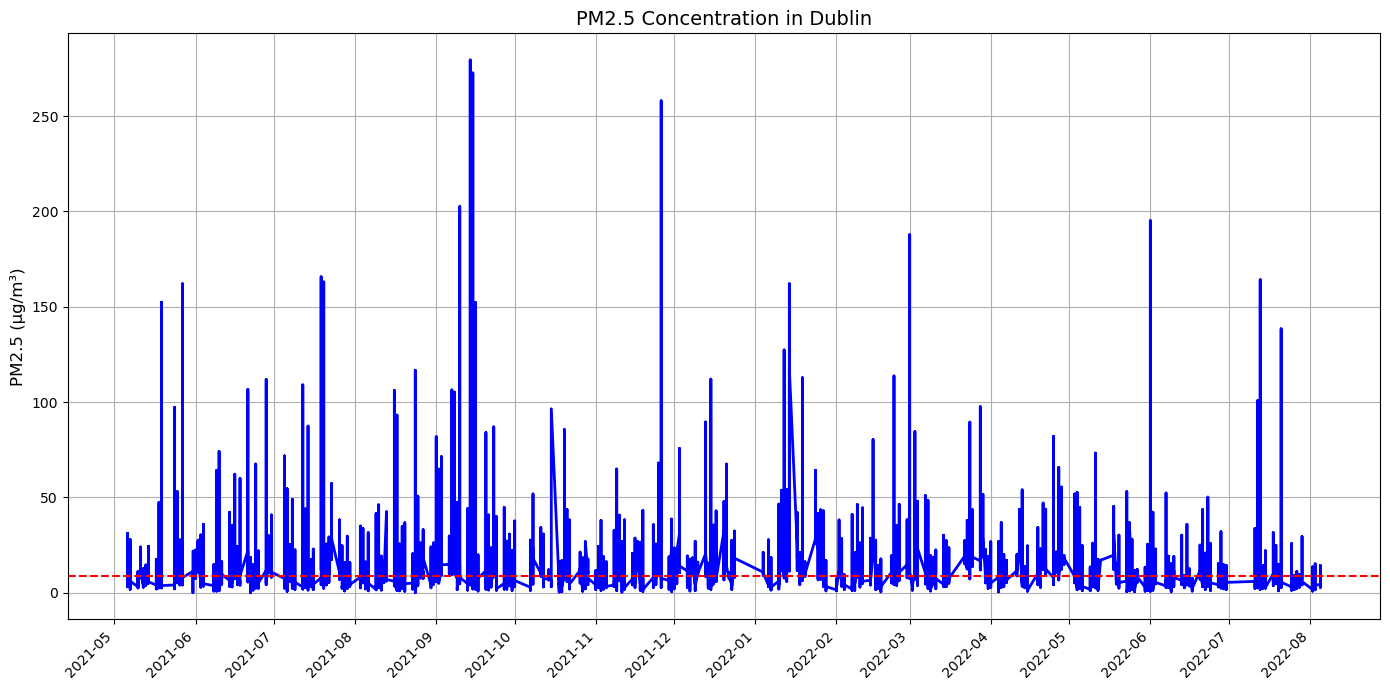

In [90]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

plt.figure(figsize=(14, 7))  # Slightly larger figure for better visibility

# Ensure the data is sorted by date if not already
df.sort_index(inplace=True)

# Plotting the PM2.5 concentration
plt.plot(df.index, df['PM25_ugm3'], label='PM2.5 Concentration', color='blue', linewidth=2)

# Customizing the plot aesthetics
plt.title('PM2.5 Concentration in Dublin', fontsize=14)
plt.ylabel('PM2.5 (µg/m³)', fontsize=12)
# add line with mean value
plt.axhline(y=df['PM25_ugm3'].mean(), color='r', linestyle='--', label='Mean PM2.5 Concentration')
# plt.legend(fontsize=10)
plt.grid(True)  # Adding a grid

# Formatting the x-axis to show year and month
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to be at the start of each month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Major ticks show the year and month

# Improve tick visibility
plt.xticks(rotation=45, ha='right')  # Rotate and align ticks for better visibility
plt.tight_layout()  # Adjust layout to not cut off labels

# Show the plot
plt.show()

Traffic Volume Plot
---
Let's plot the traffic volume to see how it changes over time.

In [68]:
df

,NO_ugm3,NO2_ugm3,O3_ugm3,CO_mgm3,CO2_mgm3,PM25_ugm3,SiteID,Lat,Long,day_of_week,...,DCC-AQ5-pm4,DCC-AQ52-pm4,DCC-AQ6-pm4,DCC-AQ1-so2,DCC-AQ13-so2,DCC-AQ22-so2,TNO2161-tsp,TNO2162-tsp,TNO4435-tsp,TNT1088-tsp
date,,,,,,,,,,,,,,,,,,,,,
2021-05-06,-16.485096,4.267365,70.815263,0.275750,786.544417,3.815981,325,53.327618,-6.309232,3,...,3.49,3.89,6.13,2.22,-0.40,0.51,0.18,7.07,8.9,8.78
2021-05-06,-0.466100,11.630600,71.484000,0.282222,800.609500,7.049500,770,53.335275,-6.317469,3,...,3.75,3.36,5.10,2.07,-0.49,0.64,0.20,7.27,11.2,4.30
2021-05-06,32.199310,14.004828,61.570000,0.404724,795.937567,3.140167,619,53.326383,-6.322198,3,...,3.75,3.36,5.10,2.07,-0.49,0.64,0.20,7.27,11.2,4.30
2021-05-06,24.686167,31.937167,54.446000,0.567000,830.621600,9.055143,487,53.329272,-6.334426,3,...,3.75,3.36,5.10,2.07,-0.49,0.64,0.20,7.27,11.2,4.30
2021-05-06,0.391708,-6.196404,80.784941,0.293809,790.788080,3.640216,547,53.306713,-6.301091,3,...,3.49,3.89,6.13,2.22,-0.40,0.51,0.18,7.07,8.9,8.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-05,NaN,NaN,NaN,NaN,NaN,3.759600,543,53.388295,-6.214775,4,...,4.81,NaN,5.07,1.95,0.20,-2.16,NaN,9.33,NaN,5.90
2022-08-05,39.784000,NaN,NaN,0.332280,813.173176,5.138429,443,53.363169,-6.221922,4,...,5.07,NaN,4.63,2.03,0.80,-2.23,NaN,15.79,NaN,2.93
2022-08-05,NaN,NaN,NaN,NaN,NaN,3.566308,963,53.339290,-6.236580,4,...,4.33,NaN,5.18,1.98,0.19,-2.54,NaN,10.29,NaN,4.03


/var/folders/96/d0b81fgx57nf5q8xrlw36p1w0000gn/T/ipykernel_18570/2194393536.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Custom labels for days


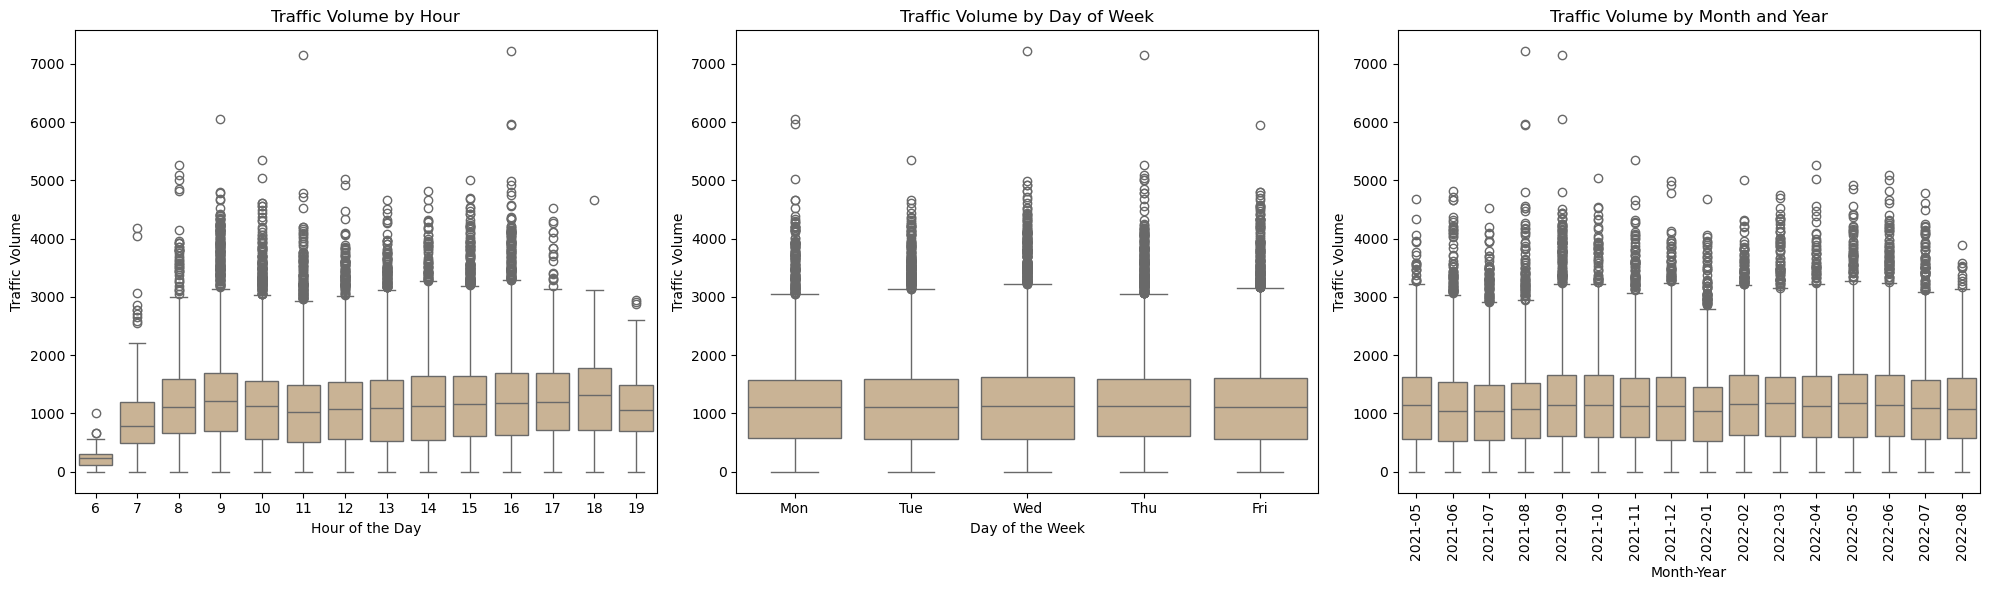

In [79]:
# Set up the matplotlib figure (3 subplots in a row)
fig, axs = plt.subplots(1, 3, figsize=(20, 6))  # Adjusted for potentially wider month-year plot

# reset the index
df.reset_index(inplace=True)

# Boxplot of traffic volume by hour
sns.boxplot(x='hour', y='traffic_volume_sum', data=df, ax=axs[0], color='tan')
axs[0].set_title('Traffic Volume by Hour')
axs[0].set_xlabel('Hour of the Day')
axs[0].set_ylabel('Traffic Volume')

# Boxplot of traffic volume by day of the week
sns.boxplot(x='day_of_week', y='traffic_volume_sum', data=df, ax=axs[1], color='tan')
axs[1].set_title('Traffic Volume by Day of Week')
axs[1].set_xlabel('Day of the Week')
axs[1].set_ylabel('Traffic Volume')
axs[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Custom labels for days

# Create a month_year column with format 'YYYY-MM'
df['month_year'] = df['date'].dt.strftime('%Y-%m')

# Boxplot of traffic volume by month
# sns.boxplot(x='month', y='traffic_volume_sum', data=df, ax=axs[2], color='tan')
# axs[2].set_title('Traffic Volume by Month')
# axs[2].set_xlabel('Month')
# axs[2].set_ylabel('Traffic Volume')
# axs[2].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Custom labels for months
sns.boxplot(x='month_year', y='traffic_volume_sum', data=df, color='tan')
plt.title('Traffic Volume by Month and Year')
# plt.xlabel('Month-Year')
plt.ylabel('Traffic Volume')
plt.xticks(rotation=90)  # Rotate labels to make them readable

# Show the plot
plt.tight_layout()
plt.show()

In [72]:
df

,date,NO_ugm3,NO2_ugm3,O3_ugm3,CO_mgm3,CO2_mgm3,PM25_ugm3,SiteID,Lat,Long,...,DCC-AQ5-pm4,DCC-AQ52-pm4,DCC-AQ6-pm4,DCC-AQ1-so2,DCC-AQ13-so2,DCC-AQ22-so2,TNO2161-tsp,TNO2162-tsp,TNO4435-tsp,TNT1088-tsp
0,2021-05-06,-16.485096,4.267365,70.815263,0.275750,786.544417,3.815981,325,53.327618,-6.309232,...,3.49,3.89,6.13,2.22,-0.40,0.51,0.18,7.07,8.9,8.78
1,2021-05-06,-0.466100,11.630600,71.484000,0.282222,800.609500,7.049500,770,53.335275,-6.317469,...,3.75,3.36,5.10,2.07,-0.49,0.64,0.20,7.27,11.2,4.30
2,2021-05-06,32.199310,14.004828,61.570000,0.404724,795.937567,3.140167,619,53.326383,-6.322198,...,3.75,3.36,5.10,2.07,-0.49,0.64,0.20,7.27,11.2,4.30
3,2021-05-06,24.686167,31.937167,54.446000,0.567000,830.621600,9.055143,487,53.329272,-6.334426,...,3.75,3.36,5.10,2.07,-0.49,0.64,0.20,7.27,11.2,4.30
4,2021-05-06,0.391708,-6.196404,80.784941,0.293809,790.788080,3.640216,547,53.306713,-6.301091,...,3.49,3.89,6.13,2.22,-0.40,0.51,0.18,7.07,8.9,8.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43190,2022-08-05,NaN,NaN,NaN,NaN,NaN,3.759600,543,53.388295,-6.214775,...,4.81,NaN,5.07,1.95,0.20,-2.16,NaN,9.33,NaN,5.90
43191,2022-08-05,39.784000,NaN,NaN,0.332280,813.173176,5.138429,443,53.363169,-6.221922,...,5.07,NaN,4.63,2.03,0.80,-2.23,NaN,15.79,NaN,2.93
43192,2022-08-05,NaN,NaN,NaN,NaN,NaN,3.566308,963,53.339290,-6.236580,...,4.33,NaN,5.18,1.98,0.19,-2.54,NaN,10.29,NaN,4.03
43193,2022-08-05,NaN,NaN,NaN,NaN,NaN,4.638738,181,53.389783,-6.246246,...,4.86,NaN,4.36,1.84,-0.13,-2.27,NaN,9.77,NaN,2.65


In [73]:
df['month'] = df['date'].dt.month

In [74]:
# Boxplot of traffic volume by month
sns.boxplot(x='month', y='traffic_volume_sum', data=df, ax=axs[2], color='tan')
axs[2].set_title('Traffic Volume by Month')
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Traffic Volume')
axs[2].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Custom labels for months

/var/folders/96/d0b81fgx57nf5q8xrlw36p1w0000gn/T/ipykernel_18570/151155038.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Custom labels for months


[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

Scatter Plot
---
Let's plot a scatter plot to see the relationship between the target variable and the traffic volume.

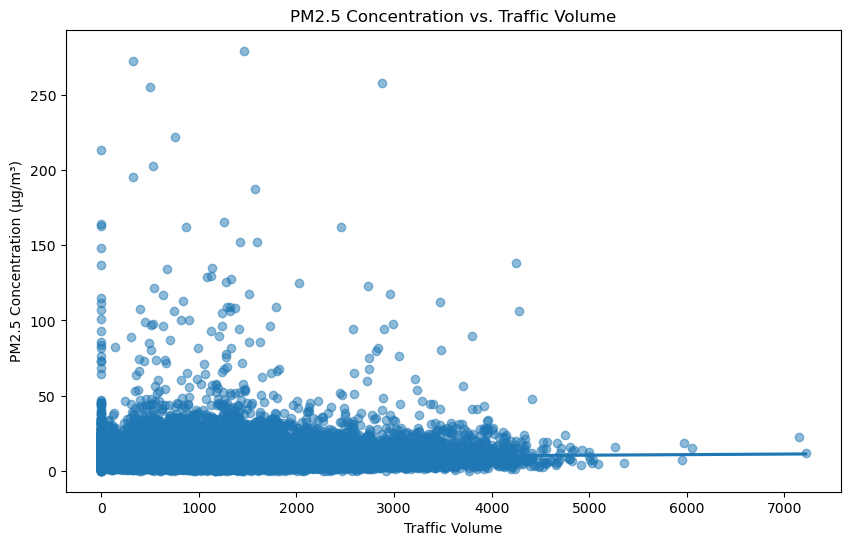

In [11]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x='traffic_volume_sum', y='PM25_ugm3', data=df, scatter_kws={'alpha':0.5})
plt.title('PM2.5 Concentration vs. Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.show()

Box Plot
---
Let's plot a box plot to see how the PM2.5 concentration varies by the day of the week.

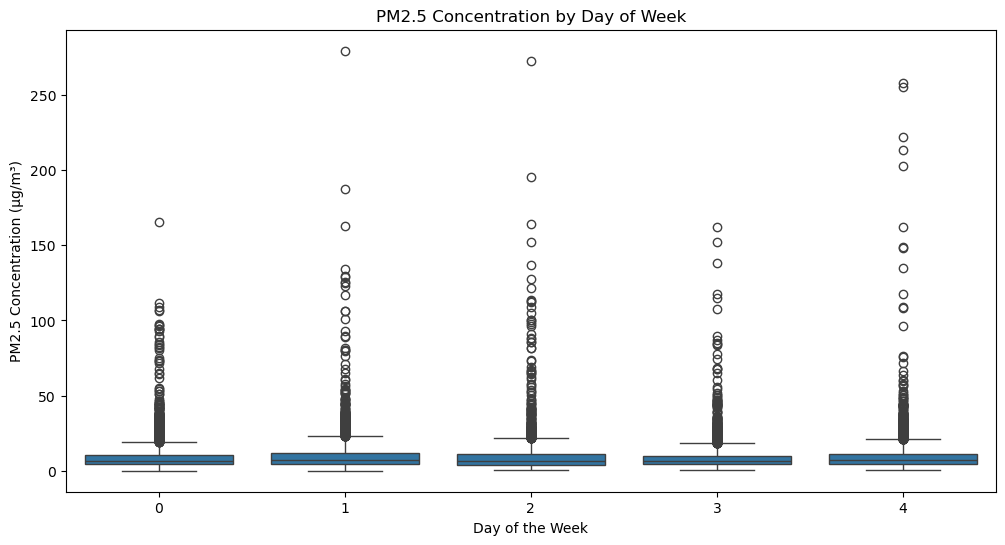

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='PM25_ugm3', data=df)
plt.title('PM2.5 Concentration by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.show()

Weather Plots
---
Let's plot some weather variables to see how they vary over time.

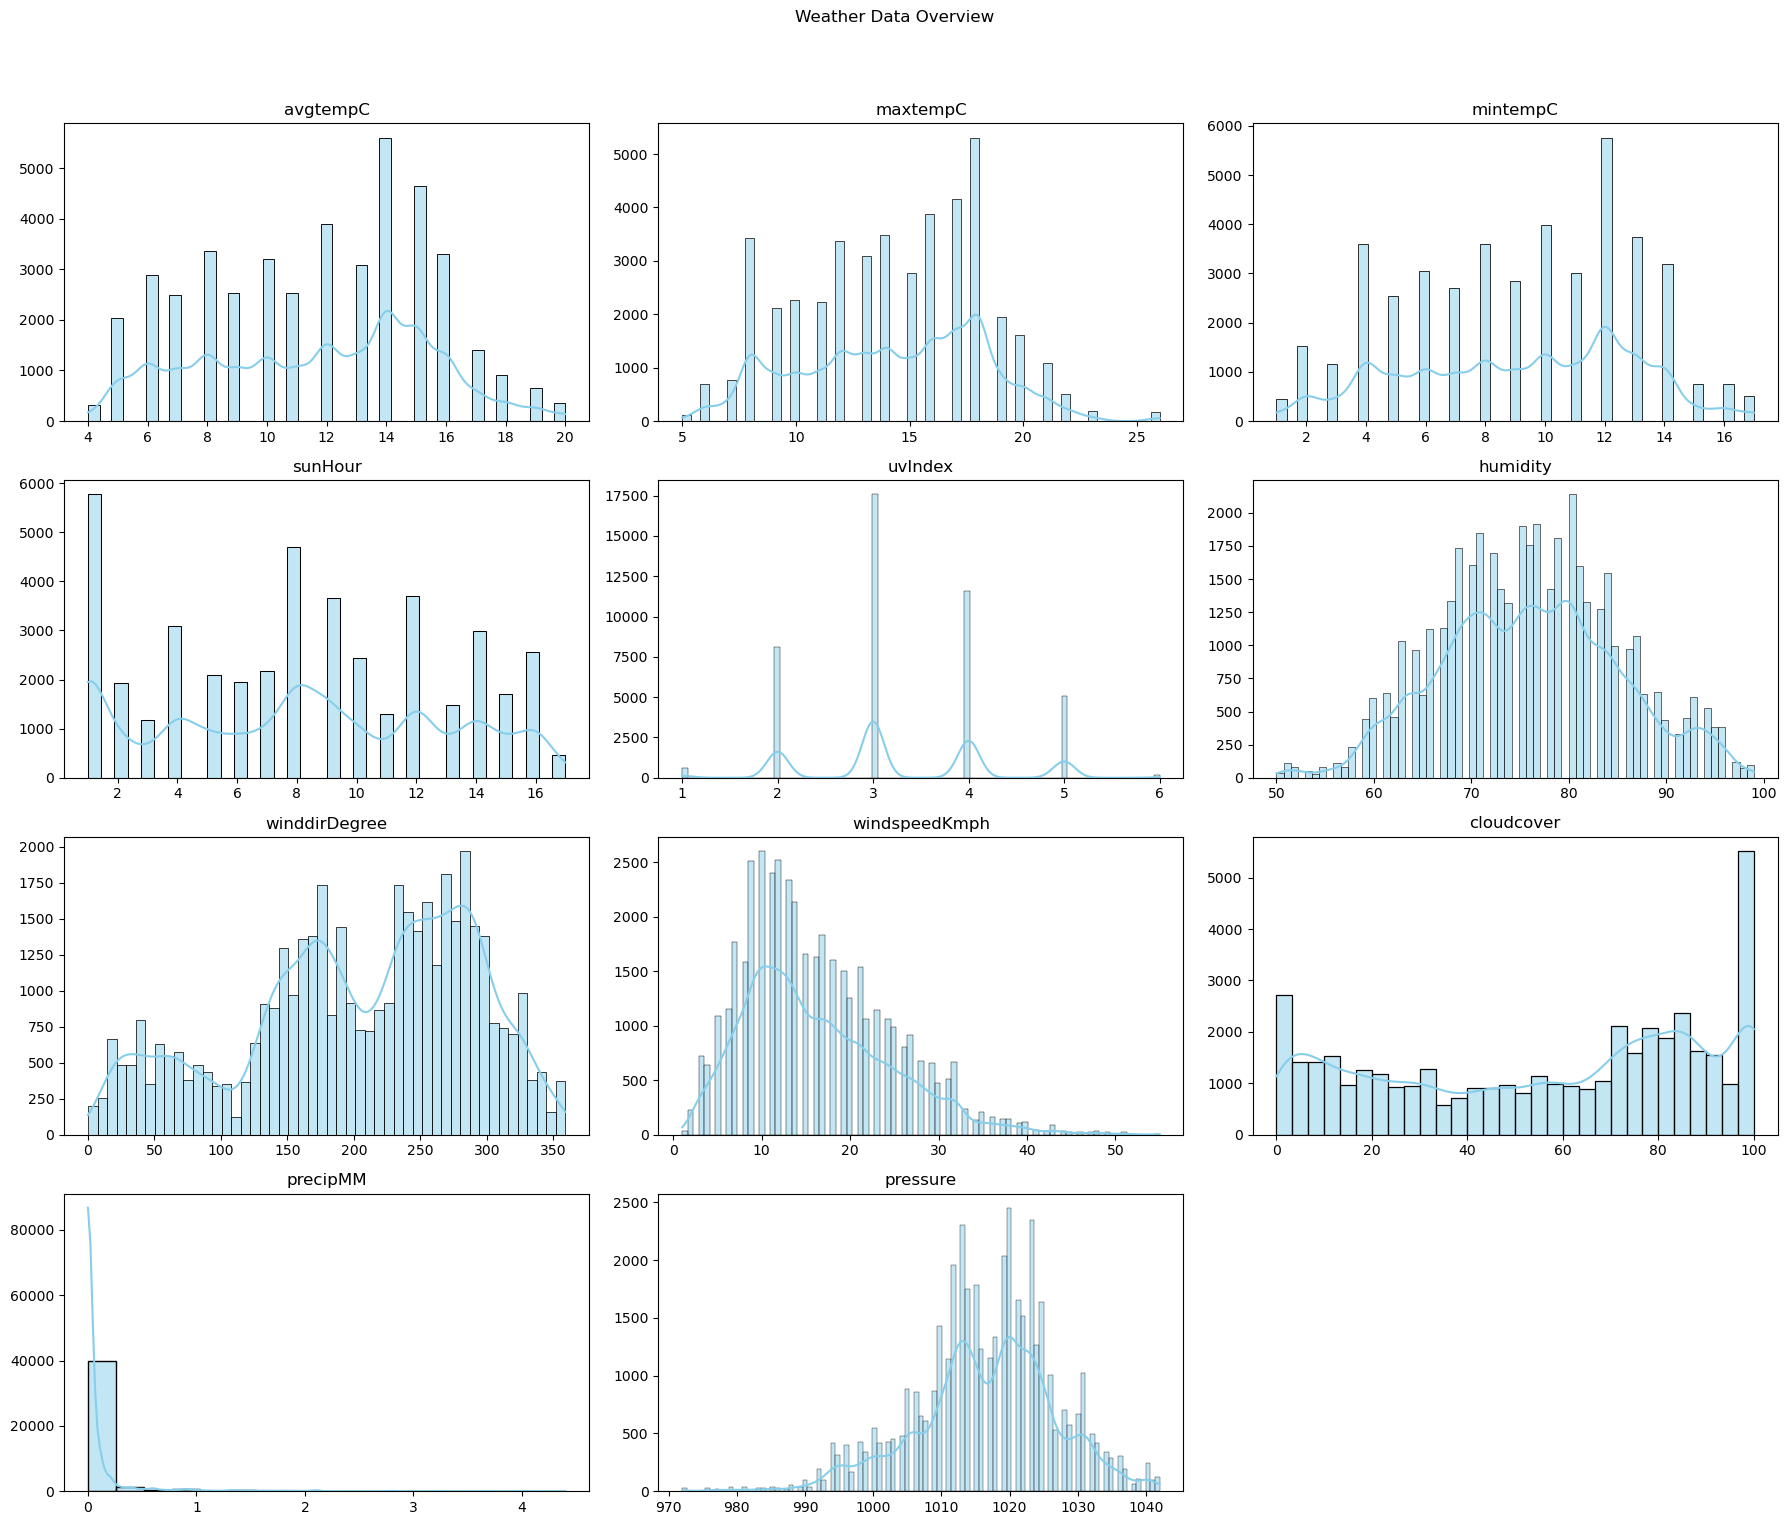

In [35]:
# Setup the figure and axes
fig, axs = plt.subplots(4, 3, figsize=(18, 16))  # Adjust the grid size based on your number of features
fig.suptitle('Weather Data Overview')

# Flatten the axis array for easier iteration
axs = axs.flatten()

# List of weather features to plot
weather_features = [
    'avgtempC', 'maxtempC', 'mintempC', 'sunHour', 
    'uvIndex', 'humidity', 'winddirDegree', 
    'windspeedKmph', 'cloudcover', 'precipMM', 'pressure'
]

# Create a plot for each feature
for i, feature in enumerate(weather_features):
    sns.histplot(data=df, x=feature, ax=axs[i], kde=True, color='skyblue')
    axs[i].set_title(feature)
    axs[i].set_xlabel('')  # Remove x labels for clarity
    axs[i].set_ylabel('')  # Remove y labels for clarity

# Hide any unused axes if there are any
for i in range(len(weather_features), len(axs)):
    axs[i].set_visible(False)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect to fit the suptitle
plt.show()

### Temperature Plots

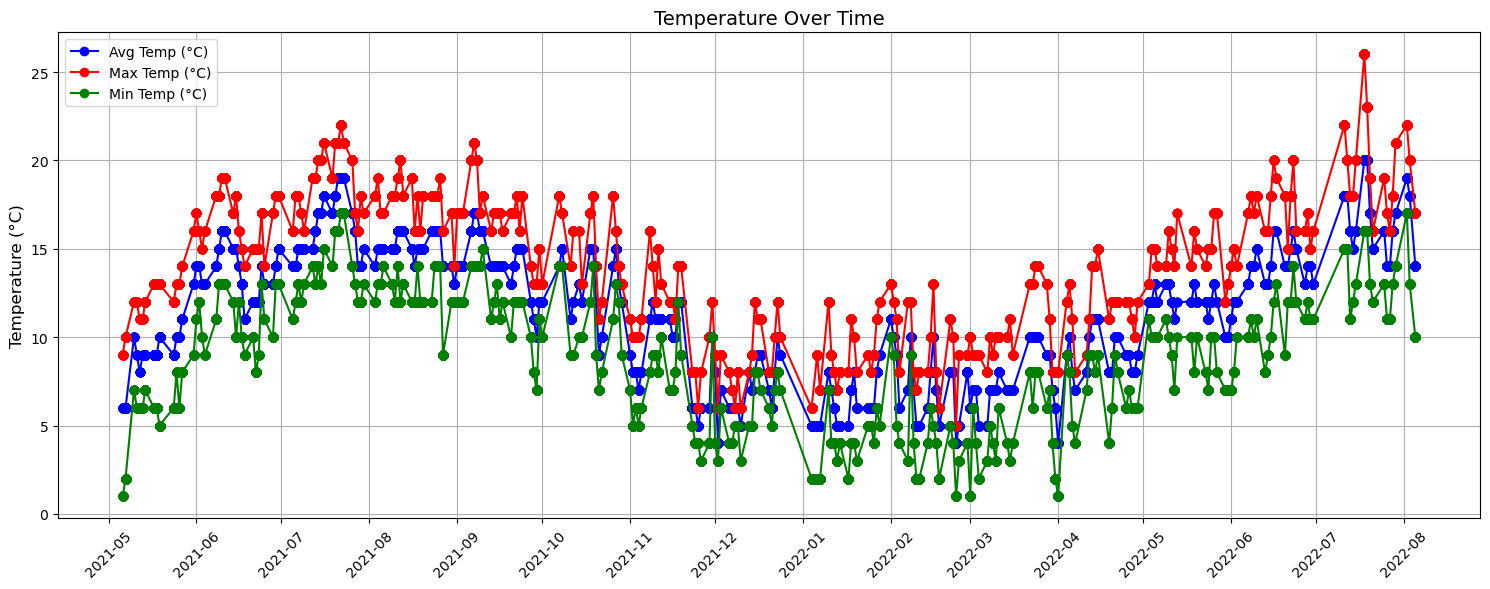

In [103]:
# Convert 'date' column to datetime if not already

plt.figure(figsize=(15, 6))

# Plot average temperature
plt.plot(df.index, df['avgtempC'], label='Avg Temp (°C)', color='blue', marker='o', linestyle='-')

# Plot maximum temperature
plt.plot(df.index, df['maxtempC'], label='Max Temp (°C)', color='red', marker='o', linestyle='-')

# Plot minimum temperature
plt.plot(df.index, df['mintempC'], label='Min Temp (°C)', color='green', marker='o', linestyle='-')

# Customizing the plot aesthetics
plt.title('Temperature Over Time', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# Formatting the x-axis to show year and month
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to be at the start of each month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Major ticks show the year and month

# Rotate and align ticks for better visibility
plt.xticks(rotation=45, ha='center')
plt.tight_layout()  # Adjust layout to not cut off labels

# Show the plot
plt.show()